# <font color='#357EC7'>PROYECTO: PREDICCIÓN DEL PRECIO DE VEHÍCULOS USADOS</font>

En el presente notebook desarrollo una aplicación de ciencia y analítica de datos con el fin de visualizar los conceptos y procedimiento de trabajo en estas áreas del conocimiento.

La aplicación consiste en constuir un modelo que permita predecir el precio de un automóvil a partir de ciertas características de los mismos.

¿Qué aplicaciones podría llegar a tener este modelo?

* A nivel empresarial marcaría una pauta para definir precios para comercializar vehículos.

* Ayudar a personas naturales a elegir un precio de venta adecuado para su vhículo.

* Otras aplicaciones.

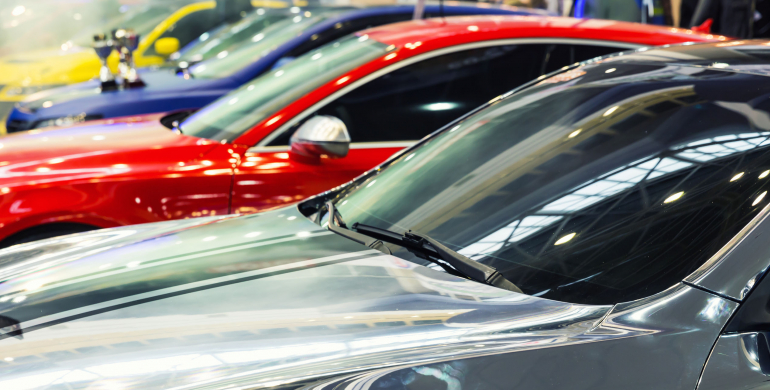

In [1]:
from IPython.display import Image
Image(filename=r'C:\Users\b55al\OneDrive\Escritorio\Documentos cursos\Data Analysis with Python\Proyecto\Imagenes\carros.jpg',width="1000", height="500")

## <font color='#357EC7'>PARTE 1: Importando, limpiando y entendiendo los datos</font>

En esta oportunidad, la fuente de datos sobre la cual se va a trabajar corresponde a un repositorio libre de la Universidad de California [1]. Este conjunto de datos posee características de un grupo de automóviles, dentro de las cuales se encuentra la variable objetivo, el precio.

El objetivo en esta sección corresponde a realizar la importación de los datos, limpieza de los datos y el análisis de algunas características en los datos.

### <font color='#357EC7'>Importando los datos</font>

Como primer paso, se importan los datos correspondientes:

In [2]:
#Se importan las librerías necesarias para la importación de datos
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline

In [3]:
# Se importan los datos que se encuentran en formato CSV.
df = pd.read_csv(r'C:\Users\b55al\OneDrive\Escritorio\Documentos cursos\Data Analysis with Python\Módulo 1\auto.csv',header=None, engine='python')

In [4]:
#Visualizar los primeros 5 registros
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### <font color='#357EC7'>Entendiendo los datos</font>

Ahora es importante entender que representa dicha información. En esta oportunidad, en la página de la fuente de datos se puede encontrar dicha información. <a href="https://archive.ics.uci.edu/ml/datasets/Automobile">Enlace a la página</a>.

<!-- Tabla de descripción del dataset-->
<table>
  <colgroup span="4" class="columns"></colgroup>
  <tr>
    <th>Número</th>
    <th>Atributo</th>
    <th>Rango</th>
  </tr>
  <tr>
    <td>1</td>
    <td>symboling</td>
    <td>-3, -2, -1, 0, 1, 2, 3.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>normalized-losses</td>
    <td>continuous from 65 to 256.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>make</td>
    <td>alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu, jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot, plymouth, porsche,renault, saab, subaru, toyota, volkswagen, volvo</td>
  </tr>
  <tr>
    <td>4</td>
    <td>fuel-type</td>
    <td>diesel,gas.</td>
  </tr>
  <tr>
    <td>5</td>
    <td>aspiration</td>
    <td>std, turbo.</td>
  </tr>
  <tr>
    <td>6</td>
    <td>num-of-doors</td>
    <td>four, two.</td>
  </tr>
  <tr>
    <td>7</td>
    <td>body-style</td>
    <td>hardtop, wagon, sedan, hatchback, convertible.</td>
  </tr>
  <tr>
    <td>8</td>
    <td>drive-wheels</td>
    <td>4wd, fwd, rwd.</td>
  </tr>
  <tr>
    <td>9</td>
    <td>engine-location</td>
    <td>front, rear.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>wheel-base</td>
    <td>continuous from 86.6 120.9. (")</td>
  </tr>
  <tr>
    <td>11</td>
    <td>length</td>
    <td>continuous from 141.1 to 208.1.(")</td>
  </tr>
  <tr>
    <td>12</td>
    <td>width</td>
    <td>continuous from 60.3 to 72.3.(")</td>
  </tr>
  <tr>
    <td>13</td>
    <td>height</td>
    <td>continuous from 47.8 to 59.8.(")</td>
  </tr>
  <tr>
    <td>14</td>
    <td>curb-weight</td>
    <td>continuous from 1488 to 4066.</td>
  </tr>
  <tr>
    <td>15</td>
    <td>engine-type</td>
    <td>dohc, dohcv, l, ohc, ohcf, ohcv, rotor.</td>
  </tr>
  <tr>
    <td>16</td>
    <td>num-of-cylinders</td>
    <td>eight, five, four, six, three, twelve, two.</td>
  </tr>
  <tr>
    <td>17</td>
    <td>engine-size</td>
    <td>continuous from 61 to 326.</td>
  </tr>
  <tr>
    <td>18</td>
    <td>fuel-system</td>
    <td>1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.</td>
  </tr>
  <tr>
    <td>19</td>
    <td>bore</td>
    <td>continuous from 2.54 to 3.94.</td>
  </tr>
  <tr>
    <td>20</td>
    <td>stroke</td>
    <td>continuous from 2.07 to 4.17.</td>
  </tr>
  <tr>
    <td>21</td>
    <td>compression-ratio</td>
    <td>continuous from 7 to 23.</td>
  </tr>
  <tr>
    <td>22</td>
    <td>horsepower</td>
    <td>continuous from 48 to 288.</td>
  </tr>
  <tr>
    <td>23</td>
    <td>peak-rpm</td>
    <td>continuous from 4150 to 6600.</td>
  </tr>
  <tr>
    <td>24</td>
    <td>city-mpg</td>
    <td>continuous from 13 to 49.</td>
  </tr>
  <tr>
    <td>25</td>
    <td>highway-mpg</td>
    <td>continuous from 16 to 54.</td>
  </tr>
</table>

Ahora se conocen las características que representan los datos en nuestro dataset. Entraré un poco más en detalle en esta parte.

<!-- Tabla Entendiendo el dataset-->
<table>
  <colgroup span="4" class="columns"></colgroup>
  <tr>
    <th>Número</th>
    <th>Atributo</th>
    <th>Detalle</th>
  </tr>
  <tr>
    <td>1</td>
    <td>symboling</td>
    <td>El primer atributo corresponde al nivel de riesgo de seguro de un automóvil. A los coches se les asigna inicialmente un símbolo de factor de riesgo asociado a su precio. Luego, si un automóvil es más riesgoso, este símbolo se ajusta moviéndolo hacia arriba en la escala. Un valor de +3 indica que el automóvil es riesgoso, -3 que probablemente sea bastante seguro.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>normalized-losses</td>
    <td>Corresponde a un valor normalizado que representa la pérdida de valor del vehículo por año.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>make</td>
    <td>Marca del vehículo.</td>
  </tr>
  <tr>
    <td>4</td>
    <td>fuel-type</td>
    <td>Tipo de combustible.</td>
  </tr>
  <tr>
    <td>5</td>
    <td>aspiration</td>
    <td>Aspiración del motor.</td>
  </tr>
  <tr>
    <td>6</td>
    <td>num-of-doors</td>
    <td>Número de puertas.</td>
  </tr>
  <tr>
    <td>7</td>
    <td>body-style</td>
    <td>Tipo de cuerpo del vehículo.</td>
  </tr>
  <tr>
    <td>8</td>
    <td>drive-wheels</td>
    <td>Tracción.</td>
  </tr>
  <tr>
    <td>9</td>
    <td>engine-location</td>
    <td>Ubicación del motor.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>wheel-base</td>
    <td>Distancia entre ejes.</td>
  </tr>
  <tr>
    <td>11</td>
    <td>length</td>
    <td>Longitud del vehículo.</td>
  </tr>
  <tr>
    <td>12</td>
    <td>width</td>
    <td>Ancho del vehículo.</td>
  </tr>
  <tr>
    <td>13</td>
    <td>height</td>
    <td>Altura del vehículo.</td>
  </tr>
  <tr>
    <td>14</td>
    <td>curb-weight</td>
    <td>El peso en vacío, es decir, el peso total de un vehículo con el equipamiento estándar y todos los consumibles operativos necesarios, como el aceite de motor, el aceite de la transmisión, el líquido refrigerante, el refrigerante del aire acondicionado y el combustible, pero sin pasajeros ni carga.</td>
  </tr>
  <tr>
    <td>15</td>
    <td>engine-type</td>
    <td>Tipo de motor.</td>
  </tr>
  <tr>
    <td>16</td>
    <td>num-of-cylinders</td>
    <td>Número de cilindros.</td>
  </tr>
  <tr>
    <td>17</td>
    <td>engine-size</td>
    <td>Tamaño del motor.</td>
  </tr>
  <tr>
    <td>18</td>
    <td>fuel-system</td>
    <td>Sistema de combustible.</td>
  </tr>
  <tr>
    <td>19</td>
    <td>bore</td>
    <td>Diámetro del pistón.</td>
  </tr>
  <tr>
    <td>20</td>
    <td>stroke</td>
    <td>Tiempos del motor.</td>
  </tr>
  <tr>
    <td>21</td>
    <td>compression-ratio</td>
    <td>Índice de compresión.</td>
  </tr>
  <tr>
    <td>22</td>
    <td>horsepower</td>
    <td>Caballos de fuerza.</td>
  </tr>
  <tr>
    <td>23</td>
    <td>peak-rpm</td>
    <td>Potencia máxima.</td>
  </tr>
  <tr>
    <td>24</td>
    <td>city-mpg</td>
    <td>Millas por galón en la ciudad.</td>
  </tr>
  <tr>
    <td>25</td>
    <td>highway-mpg</td>
    <td>Millas por galón en carretera.</td>
  </tr>
</table>

Conociendo la información anterior, se procede a realizar los ajustes al dataframe que se trabajará.

### <font color='#357EC7'>Limpiando los datos</font>

* Como primera medida, see procede a añadir las respectivas cabeceras o "headers" a las columnas del dataframe de datos para tener la información correctamente identificada.

In [5]:
# Se crea la lista de las cabeceras de las columnas
cabeceras = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("Cabeceras\n", cabeceras)

Cabeceras
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [6]:
# Se añaden las cabeceras a las columnas del dataframe y se verifica el resultado
df.columns = cabeceras
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


* Se procede a reemplazar los valores faltantes o "missing values".

In [7]:
# Se procede a cambiar la expresión '?' por la expresión 'NaN' (Not a number) y se verifica el cambio
df1=df.replace('?',np.NaN)
df1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


* Se proceden a eliminar los registros que no contengan información en la columna "price" ya que no aportarán ninguna información al objetivo planteado de predecir el precio.

In [8]:
# Se eliminan los registros que tenían el valor de la columna precio con la expresión "NaN"
df=df1.dropna(subset=["price"], axis=0)
df1.head(15)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


* En este punto es importante obtener algunas características de los datos del dataframe que permitirán ajustar los datos a las necesidades del proyecto.

    * Se identifica a qué tipo de dato corresponde cada columna

In [9]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

    * Ahora procedo a obtener una pequeña descripción estadística de los datos.

In [10]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


    * Se realiza el mismo procedimiento para las columnas de tipo no numérico

In [11]:
df[["normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style","drive-wheels","engine-location","engine-type","num-of-cylinders","fuel-system","bore","stroke","horsepower","peak-rpm","price"]].describe(include= 'all')

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,bore,stroke,horsepower,peak-rpm,price
count,164,201,201,201,199,201,201,201,201,201,201,197,197,199,199,201
unique,51,22,2,2,2,5,3,2,6,7,8,38,36,58,22,186
top,161,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,7957
freq,11,32,181,165,113,94,118,198,145,157,92,23,19,19,36,2


    * Se obtiene una descripción adicional de los datos (se identifican la cantidad de registros nulos por columna)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    164 non-null object
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         199 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 197 non-null object
stroke               197 non-null object
compression-ratio    201 non-null float64
horsepower           199 non-nul

* Se procede a identificar la cantidad de valores nulos de cada columna usando la información anterior, lo cual servirá como base para tomar decisiones respecto a ellos.

In [13]:
# Obtengo el tamaño del dataset
df.shape

(201, 26)

* Ahora sabiendo que existen 201 registros, se procede a calcular la cantidad de valores nulos

<!-- Tabla Entendiendo el dataset-->
<table>
  <colgroup span="4" class="columns"></colgroup>
  <tr>
    <th>Número</th>
    <th>Atributo</th>
    <th>Número de nulos</th>
  </tr>
  <tr>
    <td>1</td>
    <td>symboling</td>
    <td>0</td>
  </tr>
  <tr>
    <td>2</td>
    <td>normalized-losses</td>
    <td>37</td>
  </tr>
  <tr>
    <td>3</td>
    <td>make</td>
    <td>0</td>
  </tr>
  <tr>
    <td>4</td>
    <td>fuel-type</td>
    <td>0</td>
  </tr>
  <tr>
    <td>5</td>
    <td>aspiration</td>
    <td>0</td>
  </tr>
  <tr>
    <td>6</td>
    <td>num-of-doors</td>
    <td>2</td>
  </tr>
  <tr>
    <td>7</td>
    <td>body-style</td>
    <td>0</td>
  </tr>
  <tr>
    <td>8</td>
    <td>drive-wheels</td>
    <td>0</td>
  </tr>
  <tr>
    <td>9</td>
    <td>engine-location</td>
    <td>0</td>
  </tr>
  <tr>
    <td>10</td>
    <td>wheel-base</td>
    <td>0</td>
  </tr>
  <tr>
    <td>11</td>
    <td>length</td>
    <td>0</td>
  </tr>
  <tr>
    <td>12</td>
    <td>width</td>
    <td>0</td>
  </tr>
  <tr>
    <td>13</td>
    <td>height</td>
    <td>0</td>
  </tr>
  <tr>
    <td>14</td>
    <td>curb-weight</td>
    <td>0</td>
  </tr>
  <tr>
    <td>15</td>
    <td>engine-type</td>
    <td>0</td>
  </tr>
  <tr>
    <td>16</td>
    <td>num-of-cylinders</td>
    <td>0</td>
  </tr>
  <tr>
    <td>17</td>
    <td>engine-size</td>
    <td>0</td>
  </tr>
  <tr>
    <td>18</td>
    <td>fuel-system</td>
    <td>0</td>
  </tr>
  <tr>
    <td>19</td>
    <td>bore</td>
    <td>4</td>
  </tr>
  <tr>
    <td>20</td>
    <td>stroke</td>
    <td>4</td>
  </tr>
  <tr>
    <td>21</td>
    <td>compression-ratio</td>
    <td>0</td>
  </tr>
  <tr>
    <td>22</td>
    <td>horsepower</td>
    <td>2</td>
  </tr>
  <tr>
    <td>23</td>
    <td>peak-rpm</td>
    <td>2</td>
  </tr>
  <tr>
    <td>24</td>
    <td>city-mpg</td>
    <td>0</td>
  </tr>
  <tr>
    <td>25</td>
    <td>highway-mpg</td>
    <td>0</td>
  </tr>
</table>

En este momento se toma la decisión de como tratar con dichos valores nulos:
* "Normalized-losses": Se reemplazan por el valor de la media.
* "Stroke": Se reemplazan por el valor de la media.
* "bore": Se reemplazan por el valor de la media.
* "horsepower": Se reemplazan por el valor de la media.
* "peak-rpm": Se reemplazan por el valor de la media.

Esto para evitar la pérdida de información.

En cuanto a los 2 valores nulos de "num-of-doors", se proceden a asignarles el valor de 4 debido a que la mayoría de los datos corresponden a 4, de esta manera se evita la pérdida de información.

In [14]:
# Porcentaje del número de puertas de los vehículos en el dataset

four = 0
two = 0
for index, data in enumerate(df['num-of-doors']):
    if data == 'four':
        four += 1
    elif data == 'two':
        two += 1
print('Cuatro puertas: ' + str(round(four/199*100,2))+'%','Dos puertas: ' + str(round(two/199*100,2)) + '%')

Cuatro puertas: 56.78% Dos puertas: 43.22%


Se procede a realizar los ajustes concluidos anteriormente:

In [15]:
# Reemplazo de los nulos en "Normalized-losses"
prom_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Promedio de la columna normalized-losses:", prom_norm_loss)
df["normalized-losses"].replace(np.nan, prom_norm_loss, inplace=True)

# Reemplazo de los nulos en "stroke"
prom_stroke = df["stroke"].astype("float").mean(axis=0)
print("Promedio de la columna stroke:", prom_stroke)
df["stroke"].replace(np.nan, prom_stroke, inplace=True)

# Reemplazo de los nulos en "bore"
prom_bore = df["bore"].astype("float").mean(axis=0)
print("Promedio de la columna bore:", prom_bore)
df["bore"].replace(np.nan, prom_bore, inplace=True)

# Reemplazo de los nulos en "horsepower"
prom_horsepower = df["horsepower"].astype("float").mean(axis=0)
print("Promedio de la columna horsepower:", prom_horsepower)
df["horsepower"].replace(np.nan, prom_horsepower, inplace=True)

# Reemplazo de los nulos en "peak-rpm"
prom_peak_rpm = df["peak-rpm"].astype("float").mean(axis=0)
print("Promedio de la columna peak-rpm:", prom_peak_rpm)
df["peak-rpm"].replace(np.nan, prom_horsepower, inplace=True)

# Reemplazo de los nulos en "num-of-doors"
df["num-of-doors"].replace(np.nan, "four", inplace=True)

Promedio de la columna normalized-losses: 122.0
Promedio de la columna stroke: 3.2569035532994857
Promedio de la columna bore: 3.3307106598984775
Promedio de la columna horsepower: 103.39698492462311
Promedio de la columna peak-rpm: 5117.587939698493


* Se verifican que los cambios hayan trabajado correctamente

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    201 non-null object
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    201 non-null float64
horsepower           201 non-nul

* Ahora se observa que no existen valores nulos en las columnas.

* Al haber borrado columnas, se debe reiniciar los índices.

In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
# Se verifica el dataframe

df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


* En este punto ya es notorio que los tipos de datos de algunas columnas no son correctos, por lo que se procede a corregir el tipo de dato de los valores numéricos que están como tipo object en el dataframe.

In [19]:
# "bore" pasa de ser un dato tipo object a ser tipo flotante
df[["bore"]] = df[["bore"]].astype("float")
# "stroke" pasa de ser un dato tipo object a ser tipo flotante
df[["stroke"]] = df[["stroke"]].astype("float")
# "normalized-losses" pasa de ser un dato tipo object a ser tipo entero
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
# "price" pasa de ser un dato tipo object a ser tipo flotante
df[["price"]] = df[["price"]].astype("float")
# "peak-rpm" pasa de ser un dato tipo object a ser tipo flotantee
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
# "horsepower" pasa a ser de tipo object a tipo entero
df[["horsepower"]] = df[["horsepower"]].astype("int")
print('La columna "bore" ahora es de tipo: "'+ str(type(df.loc[0,"bore"])))
print('La columna "stroke" ahora es de tipo: '+ str(type(df.loc[0,"stroke"])))
print('La columna "normalized-losses" ahora es de tipo: '+ str(type(df.loc[0,"normalized-losses"])))
print('La columna "price" ahora es de tipo: '+ str(type(df.loc[0,"price"])))
print('La columna "peak-rpm" ahora es de tipo: '+ str(type(df.loc[0,"peak-rpm"])))
print('La columna "horsepower" ahora es de tipo: '+ str(type(df.loc[0,"horsepower"])))

La columna "bore" ahora es de tipo: "<class 'numpy.float64'>
La columna "stroke" ahora es de tipo: <class 'numpy.float64'>
La columna "normalized-losses" ahora es de tipo: <class 'numpy.int32'>
La columna "price" ahora es de tipo: <class 'numpy.float64'>
La columna "peak-rpm" ahora es de tipo: <class 'numpy.float64'>
La columna "horsepower" ahora es de tipo: <class 'numpy.int32'>


* Se verifican los tipos de datos de las columnas del dataframe nuevamente para asegurar que son ahora correctos.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int32
make                 201 non-null object
fuel-type            201 non-null object
aspiration           201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-nu

* Ya con los datos sin valores nulos y del tipo correcto, se procede a realizar los ajustes a los datos de tal manera que sea posible sacarle el máximo provecho en los datos en la etapa de implementación del modelo.

* En caso que se requiera, se realiza un proceso de estándarización para manejar la variable de recorrido en unidades L/100Km.

In [21]:
# Conversión de variables "millas por galón" a " L/100Km"
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df["highway-mpg"]
df[['city-L/100km','highway-L/100km']].head()

,city-L/100km,highway-L/100km
0,11.190476,8.703704
1,11.190476,8.703704
2,12.368421,9.038462
3,9.791667,7.833333
4,13.055556,10.681818


* Se realiza un proceso de normalización de las variables "length", "width", height" para trabajarlas en téminos similares de proporción.

In [22]:
# Normalización de las variables "length", "width" y "height"
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


* En el caso de la variable "horsepower", se puede observar que corresponde a una variable numérica con valores distintos a lo largo de los registros, (como se analizó anteriormente, esta columna posee cerca de 58 valores únicos) lo que hace complejo la utilización de esta información en el momento del dspligue del modelo y simplificar el análisis, por lo que se decide trabajar con 3 grupos de clasificación de "horsepower". Se trabajará con valores bajo, medio y alto.

In [23]:
# Agrupación de los valores de "horsepower"

grupos = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
nombres_grupos = ['Bajo', 'Medio', 'Alto']
df['horsepower-por-grupos'] = pd.cut(df['horsepower'], grupos, labels=nombres_grupos, include_lowest=True )
print(df[['horsepower','horsepower-por-grupos']].head(8))
print(df["horsepower-por-grupos"].value_counts())

   horsepower horsepower-por-grupos
0         111                  Bajo
1         111                  Bajo
2         154                 Medio
3         102                  Bajo
4         115                  Bajo
5         110                  Bajo
6         110                  Bajo
7         110                  Bajo
Bajo     153
Medio     43
Alto       5
Name: horsepower-por-grupos, dtype: int64


    * Aqui se puede visualizar la nueva distribución de la variable. 

Text(0.5,1,'Horsepower-por-grupos')

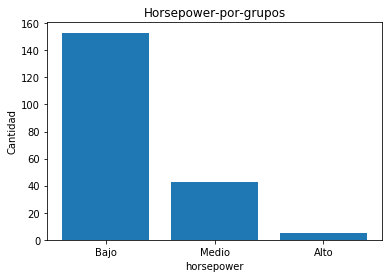

In [24]:
# Gráfica de 'horsepower-por-grupos'
plt.bar(nombres_grupos, df["horsepower-por-grupos"].value_counts())

# labels y título
plt.xlabel("horsepower")
plt.ylabel("Cantidad")
plt.title("Horsepower-por-grupos")

Text(0.5,1,'Horsepower-por-grupos')

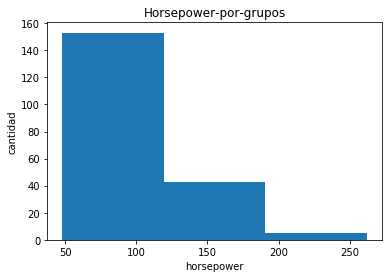

In [25]:
# Histograma con 3 grupos.
plt.hist(df["horsepower"], bins = 3)

# Labels y título.
plt.xlabel("horsepower")
plt.ylabel("cantidad")
plt.title("Horsepower-por-grupos")

* Una variable categórica clasifica en grupos los elementos según corresponda, como ocurre con la columna o característica "fuel-type" y "aspiration". Estas variables nos dan información, pero de la manera en la que está presentada dificulta su utilización. Se procede a crear variables "dummies" o ficticias de tal manera que se pueda aprovchar estas clasificaciones trabajándolas numéricamente y no como variables tipo object.

In [26]:
# Transformación de una variable categórica a una variable "dummy" o ficticia.
variable_dummy_1 = pd.get_dummies(df["fuel-type"])
variable_dummy_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
variable_dummy_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [27]:
# Se agrega la variable dummy 1 al dataframe 
df = pd.concat([df, variable_dummy_1], axis=1)

# Se elimina la variable original "fuel-type" ya que representa información redundante, ya se ha explotado.
df.drop("fuel-type", axis = 1, inplace=True)

In [28]:
# Transformación de una variable categórica a una variable "dummy" o ficticia.
variable_dummy_2 = pd.get_dummies(df['aspiration'])
variable_dummy_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
variable_dummy_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [29]:
# Se agrega la variable dummy 2 al dataframe 
df = pd.concat([df, variable_dummy_2], axis=1)
# Se elimina la variable original "aspiration" ya que representa información redundante, ya se ha explotado.
df.drop('aspiration', axis = 1, inplace=True)

In [30]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-por-grupos,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Bajo,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Bajo,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medio,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Bajo,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Bajo,0,1,1,0


Con esto se termina la parte de limpieza de datos o data cleaning y se procede a la siguiente etapa.

## <font color='#357EC7'>PARTE 2: Análisis exploratorio de los datos</font>

* Como primera medida, para encontrar relaciones entre valores numéricos, se procede a indagar a cerca de las correlaciones entre sí.

In [31]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,...,0.184329,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,...,0.165739,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,...,-0.216982,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,...,-0.227049,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,...,-0.192925,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,...,-0.187254,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,...,-0.188207,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,...,-0.186596,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,...,-0.219966,-0.582121,-0.591390,0.543154,0.554726,0.559197,0.054435,-0.054435,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,...,-0.191737,-0.034079,-0.034741,0.082267,0.036285,0.047199,0.241033,-0.241033,-0.218190,0.218190


* Se hace uso de la gráfica de dispersión para observar gráficamente la correlación entre las variables.

(0, 56296.396894222125)

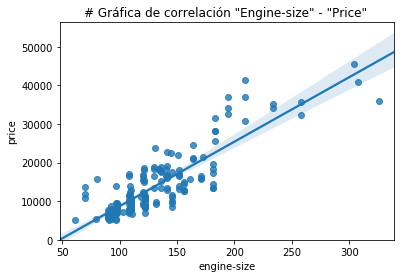

In [32]:
# Gráfica de correlación "Engine-size" - "Price"
sns.regplot(x="engine-size", y="price", data=df)
plt.title('# Gráfica de correlación "Engine-size" - "Price" ')
plt.ylim(0,)

* La gráfica plantea que la correlación entre ambas variables 'engine-size' y el objetivo 'price' es bastante buena, por lo que 'engine-size' es un buen candidato a ser una variable predictora del precio. Se procede a verificar numéricamente el valor de dicha correlación.

In [33]:
# Correlación entre "engine-size" y "price"
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


* Se verifica una correlación positiva bastante fuerte, lo que indica que al aumentar el valor de "engine-size", aumenta el valor de "price".

* De la misma manera, la variable "highway-mpg" tiene un grado de correlación suficiente para ser considerada como posible variable predictora.

(0, 48294.372620972485)

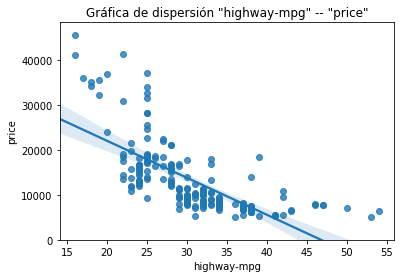

In [34]:
# Gráfica de dispersión "highway-mpg" -- "price"
sns.regplot(x="highway-mpg", y="price", data=df)
plt.title('Gráfica de dispersión "highway-mpg" -- "price"')
plt.ylim(0,)

In [35]:
# Correlación entre "highway-mpg" y "price"
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


* Al aumentar el valor de la variable "highway-mpg", disminuye el valor de la variable "price".

* Cómo paso siguiente se le dará tratamiento a las demás variables categóricas recolectadas en el dataframe

    * Primero se visualiza la variable "body-style" para comprender si tiene impacto directo en la variable objetivo "price", por lo que se recurre a la gráfica de cajas.

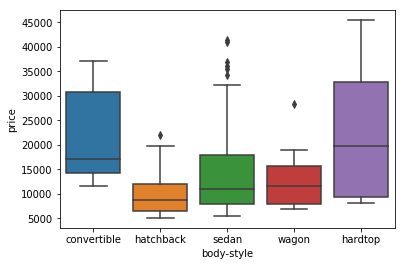

In [36]:
# Gráfica de cajas "body-style" - "price"
sns.boxplot(x="body-style", y="price", data=df)

    * Se observa que las diferentes categorías no tienen una marcada diferencia en cuanto a la distribución del precio, por lo que no sería una buena variable predictora del precio.

    * Se realiza el mismo análisis con las variables "engine-location" y "price"

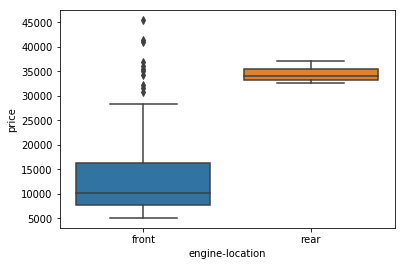

In [37]:
## Gráfica de cajas "engine-location" - "price"
sns.boxplot(x="engine-location", y="price", data=df)

    *Al contrario que "body-style", la categorización de "engine location" parece tener bien marcada la diferencia de precios en sus diferentes clasificaciones, esto indica que es una buena variable candidata predictora de "price".

    * Se repite el mismo ejercicio con "drivee-wheels" y price.

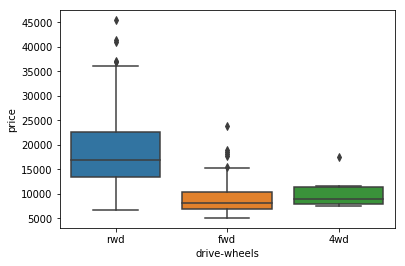

In [38]:
# Gráfica de cajas "drive-wheels" - "price"
sns.boxplot(x="drive-wheels", y="price", data=df)

    *También se observa diferencia suficiente en sus valores para considerarla variable candidata predictora de "price".

* Como método de validación de los resultados anteriores, se procede a confirmar la cantidad de datos presentes en cada categoría de cada variable.

In [39]:
# Conteo de registros de catgorías een "engine-location"
conteo_engine_location = df['engine-location'].value_counts().to_frame()
conteo_engine_location.rename(columns={'engine-location': 'value_counts'}, inplace=True)
conteo_engine_location.index.name = 'engine-location'
conteo_engine_location

,value_counts
engine-location,
front,198
rear,3


In [40]:
# Conteo de registros de catgorías en "drive-wheels"
conteo_drive_wheels = df['drive-wheels'].value_counts().to_frame()
conteo_drive_wheels.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
conteo_drive_wheels.index.name = 'drive-wheels'
conteo_drive_wheels

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


* Con el proceso anterior, se descarta dirctamente la variable "engine-location" ya que una de sus catgorías, "rear", solo contiene 3 registros de los 201 totales. No hay suficiente información de esta variable para que se pueda utilizar como predictora.

* Ahora es posible entrar más en detalle con respecto a las variables categóricas y encontrar nueva información relevante.

    * Precio por 'drive-wheels'

In [41]:
# Precio por 'drive-wheels'
df_grupo_uno = df[['drive-wheels','body-style','price']]
df_grupo_uno = df_grupo_uno.groupby(['drive-wheels'],as_index=False).mean()
df_grupo_uno

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


    *Agrupado por 'drive-wheels' y 'body-style'

In [42]:
# Agrupación en tabla "pivote"
df_grupo_uno = df[['drive-wheels','body-style','price']]
agrupado = df_grupo_uno.groupby(['drive-wheels','body-style'],as_index=False).mean()
agrupacion_pivote = agrupado.pivot(index='drive-wheels',columns='body-style')
agrupacion_pivote = agrupacion_pivote.fillna(0)
agrupacion_pivote
#df_grupo_uno 

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

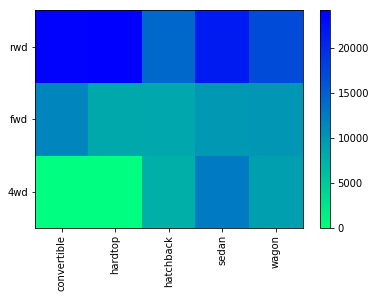

In [43]:
# Mapa de calor
fig, ax = plt.subplots()
im = ax.pcolor(agrupacion_pivote, cmap='winter_r')

row_labels = agrupacion_pivote.columns.levels[1]
col_labels = agrupacion_pivote.index

ax.set_xticks(np.arange(agrupacion_pivote.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(agrupacion_pivote.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

* Ya se puede observar la interacción de ambas variables con respecto al precio. Ayudan a confirmar lo visualizado anteriormente en las gráficas de caja, la "body-style" no afecta al precio en la medida que lo hace "drive-wheels".

* Se lleva a cabo un análisis de varianza ANOVA para determinar de las variables categóricas cuál tendría mayor influencia sobre el resultado final. ("Correlación "price" y la categoría")

In [44]:
df_grupo_test = df[['drive-wheels','body-style','price']]
df_grupo_test1 = df_grupo_test[['drive-wheels', 'price']].groupby(['drive-wheels'])
df_grupo_test1.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [45]:
# Agrupación de precio para la categoría "4wd"
df_grupo_test1.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [46]:
# ANOVA
f_val, p_val = stats.f_oneway(df_grupo_test1.get_group('fwd')['price'], df_grupo_test1.get_group('rwd')['price'], df_grupo_test1.get_group('4wd')['price'])  
 
print( "Resultados ANOVA: F=", f_val, ", P =", p_val)   

Resultados ANOVA: F= 67.95406500780399 , P = 3.3945443577151245e-23


    * Existe una varianza de medias estadísticamente significante para que aporten a la predicción. Ahora se confirmarán de a pares, de manera más específica.

In [47]:
# Sólo '4wd' y 'rwd' de 'drive-wheels'
f_val, p_val = stats.f_oneway(df_grupo_test1.get_group('4wd')['price'], df_grupo_test1.get_group('rwd')['price'])  
 
print( "Resultados ANOVA: F=", f_val, ", P =", p_val)   

Resultados ANOVA: F= 8.580681368924756 , P = 0.004411492211225333


In [48]:
# Sólo 'fwd' y 'rwd' de 'drive-wheels'
f_val, p_val = stats.f_oneway(df_grupo_test1.get_group('fwd')['price'], df_grupo_test1.get_group('rwd')['price'])  
 
print( "Resultados ANOVA: F=", f_val, ", P =", p_val)   

Resultados ANOVA: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [49]:
# Sólo '4wd' y 'fwd' de 'drive-wheels'
f_val, p_val = stats.f_oneway(df_grupo_test1.get_group('4wd')['price'], df_grupo_test1.get_group('fwd')['price'])  
 
print( "Resultados ANOVA: F=", f_val, ", P =", p_val)   

Resultados ANOVA: F= 0.665465750252303 , P = 0.41620116697845666


    * La diferencia es significativa para las catgorías '4wd' y 'rwd'

* Es momento de tener en consideración las variables numéricas, confirmando el valor de la correlación de las variables desplegada en el inicio del análisis y así confirmar cuales son las variables funcionales en la obtención del objetivo.

    * "horsepower"

In [50]:
# Correlación de la variabl "horsepower" y "price".
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("Valor de la correlación Pearson: ", pearson_coef, " con un P-valor de: ", p_value)  

Valor de la correlación Pearson:  0.8097290352560286  con un P-valor de:  5.924001027593048e-48


    * Con estos valores, "horsepower" muestra tener una correlación positiva fuerte con "price".

    * "length"

In [51]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("Valor de la correlación Pearson: ", pearson_coef, " con un P-valor de: ", p_value)  

Valor de la correlación Pearson:  0.6906283804483642  con un P-valor de:  8.016477466158713e-30


    * Con estos valores, "length" muestra tener una correlación positiva moderada con "price".

    * "width"

In [52]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("Valor de la correlación Pearson: ", pearson_coef, " con un P-valor de: ", p_value)  

Valor de la correlación Pearson:  0.7512653440522673  con un P-valor de:  9.20033551048166e-38


    * Con estos valores, "width" muestra tener una correlación positiva fuerte con "price".

    * "curb-weight"

In [53]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("Valor de la correlación Pearson: ", pearson_coef, " con un P-valor de: ", p_value)  

Valor de la correlación Pearson:  0.8344145257702846  con un P-valor de:  2.1895772388936997e-53


    * Con estos valores, "curb-weight" muestra tener una correlación positiva fuerte con "price".

    * "engine-size"

In [54]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("Valor de la correlación Pearson: ", pearson_coef, " con un P-valor de: ", p_value)  

Valor de la correlación Pearson:  0.8723351674455185  con un P-valor de:  9.265491622197996e-64


    * Con estos valores, "engine-size" muestra tener una correlación positiva fuerte con "price".

    * "bore"

In [55]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("Valor de la correlación Pearson: ", pearson_coef, " con un P-valor de: ", p_value)  

Valor de la correlación Pearson:  0.5431537659807731  con un P-valor de:  8.051208825441229e-17


    * Con estos valores, "bore" muestra tener una correlación positiva moderada con "price".

    * "city-L/100km"

In [56]:
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
print("Valor de la correlación Pearson: ", pearson_coef, " con un P-valor de: ", p_value)  

Valor de la correlación Pearson:  0.7898975136626942  con un P-valor de:  3.9031064009399405e-44


    * Con estos valores, "city-L/100km" muestra tener una correlación positiva fuerte con "price".

    * "highway-L/100km"

In [57]:
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
print("Valor de la correlación Pearson: ", pearson_coef, " con un P-valor de: ", p_value)  

Valor de la correlación Pearson:  0.8011176263981975  con un P-valor de:  3.0467845810412534e-46


    * Con estos valores, "highway-L/100km" muestra tener una correlación positiva fuerte con "price".

* Ahora existe una perspectiva más fuerte y con las variables identificadas para ser utilizadas en la construcción del modelo para optimizar su desempeño: 
    
    
<!-- Tabla Entendiendo el dataset-->
<table>
  <colgroup span="4" class="columns"></colgroup>
  <tr>
    <th>Variable</th>
    <th>Tipo</th>
  </tr>
  <tr>
    <td>'Length'</td>
    <td>Numérica</td>
  </tr>
  <tr>
    <td>'Width'</td>
    <td>Numérica</td>
  </tr>
  <tr>
    <td>'Curb-weight'</td>
    <td>Numérica</td>
  </tr>
  <tr>
    <td>'Engine-size'</td>
    <td>Numérica</td>
  </tr>
  <tr>
    <td>'Horsepower'</td>
    <td>Numérica</td>
  </tr>
  <tr>
    <td>'city-L/100km'</td>
    <td>Numérica</td>
  </tr>
  <tr>
    <td>'highway-L/100km'</td>
    <td>Numérica</td>
  </tr>
  <tr>
    <td>'Wheel-base'</td>
    <td>Numérica</td>
  </tr>
  <tr>
    <td>'Bore'</td>
    <td>Numérica</td>
  </tr>
  <tr>
    <td>'Drive-wheels'</td>
    <td>Catgórica</td>
  </tr>
</table>
    
    
    
Con esta información clara e identificada, se procede a avanzar a la siguiente etapa.

## <font color='#357EC7'>PARTE 3: Implementación del modelo </font>

Basado en las características de los datos, se irán implementando diferentes modelos de regresión lineal para la predicción de la variable 'price'.

### <font color='#357EC7'>Modelo 1: Regresión Lineal - "highway-L/100km" - "price" </font>

In [58]:
# Se crea el objeto de la regresión
lm = LinearRegression()
# Se definen las variables predictoras (x) y la variable objetivo (y)
x = df[['highway-L/100km']]
y = df['price']
# Se realiza el cálculo de la regresión
lm.fit(x,y)
# Se realiza la predicción de "price"
Resultado = lm.predict(x)
print("Los 5 primeros valores de predicción del modelo: ",Resultado[0:5])   

Los 5 primeros valores de predicción del modelo:  [15485.52737455 15485.52737455 16643.34931414 12475.19033163
 22327.2024721 ]


* Se obtiene la ecuación del modelo

In [59]:
# Valor a del modelo
print('Valores del modelo: ' + 'a = [' + str(lm.intercept_) + '] b = ' + str(lm.coef_))
print(' ')
print('La ecuación del modelo 1 es: "price" = ' + str(str(lm.intercept_)) + ' + ' + str(lm.coef_) + ' * "highway-L/100km"')

Valores del modelo: a = [-14617.843054664598] b = [3458.68511314]
 
La ecuación del modelo 1 es: "price" = -14617.843054664598 + [3458.68511314] * "highway-L/100km"


* Gráfica de Regresión Modelo 1

(0, 47820.31437983927)

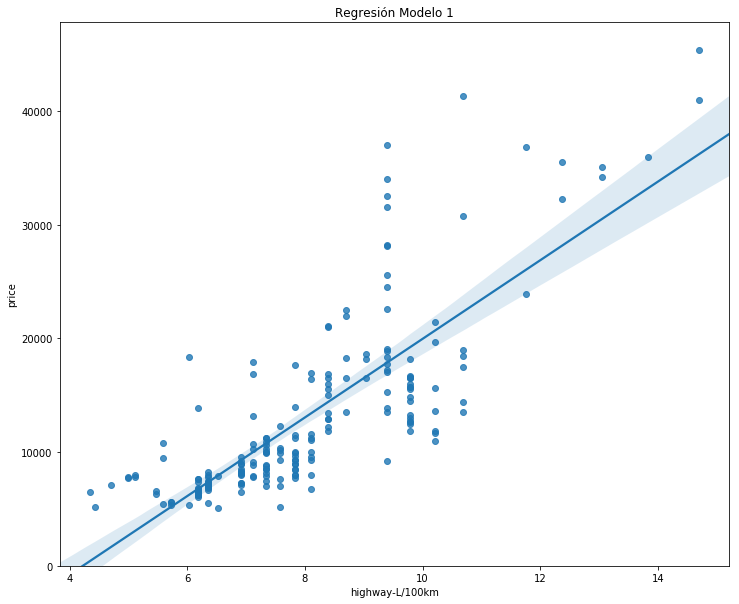

In [60]:
# Gráfica regresión modelo 1
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-L/100km", y="price", data=df)
plt.title('Regresión Modelo 1')
plt.ylim(0,)

* Gráfica Residual

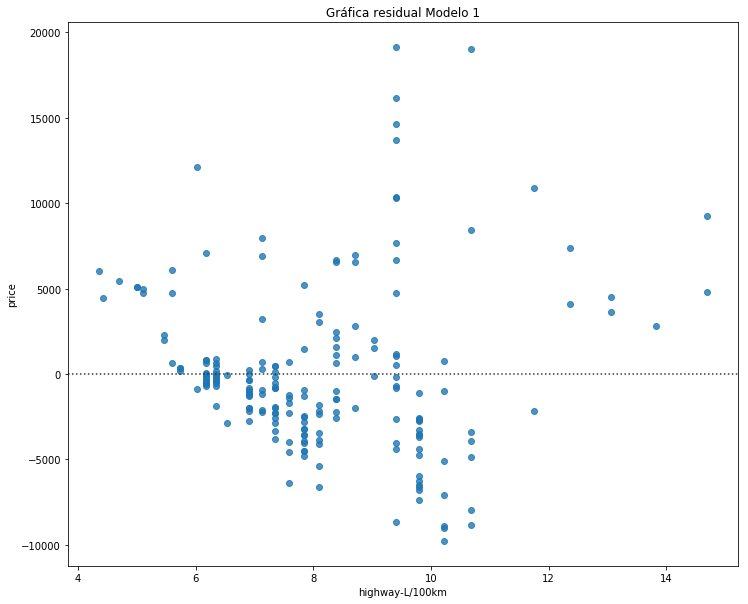

In [61]:
# Gráfica Residual
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-L/100km'], df['price'])
plt.title('Gráfica residual Modelo 1')
plt.show()

    * Los datos dispersos aleatóreamente hacen referencia al buen funcionamiento del modelo lineal.

* Medidas de error

In [62]:
# R cuadrado
print('El R-Cuadrado es: ', lm.score(x, y))
print('Aproximadamente el 64,18% de las variaciones en "price" son explicadas por las variaciones en "highway-L/100km"')
# Error cuadrático medio
mse = mean_squared_error(df['price'], Resultado)
print('El error cuadrático medio de "price" y la predicción es: ', mse)

El R-Cuadrado es:  0.6417894513258818
Aproximadamente el 64,18% de las variaciones en "price" son explicadas por las variaciones en "highway-L/100km"
El error cuadrático medio de "price" y la predicción es:  22510543.777085222


### <font color='#357EC7'>Modelo 2: Regresión Lineal Múltiple - "highway-L/100km","horsepower", "curb-weight", "engine-size" - "price" </font>

* Se observó en la etapa anterior las propiedades de estas variables y las razones por las cuáles serían buenas predictoras.

In [63]:
# Se crea un dataframe de las variables predictoras
z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]
# Se crea y entrena el modelo
lm2 = LinearRegression()
lm2.fit(z, df['price'])
Resultado2 = lm2.predict(z)
print("Los 5 primeros valores de predicción del modelo: ",Resultado2[0:5])  

Los 5 primeros valores de predicción del modelo:  [14055.18192433 14055.18192433 18643.05058857 10759.40130978
 16667.53138368]


In [64]:
# Valor a del modelo
print('Valores del modelo: ' + 'a = [' + str(lm2.intercept_) + '] b = ' + str(lm2.coef_))
b = lm2.coef_
print(' ')
print('La ecuación del modelo 1 es:\n "price" = ' + str(str(lm2.intercept_)) + ' + ' + str(b[0]) +' * "horsepower" +' +
str(b[1]) + ' * "curb-weight" + ' + str(b[2]) + ' * "engine-size" + ' + str(b[3]) + ' * "highway-L/100km"')

Valores del modelo: a = [-14382.161315163678] b = [ 36.76149419   3.50153554  85.32658561 498.91963877]
 
La ecuación del modelo 1 es:
 "price" = -14382.161315163678 + 36.76149419225388 * "horsepower" +3.5015355364151906 * "curb-weight" + 85.32658561210977 * "engine-size" + 498.9196387673915 * "highway-L/100km"


* Gráfica de distribución

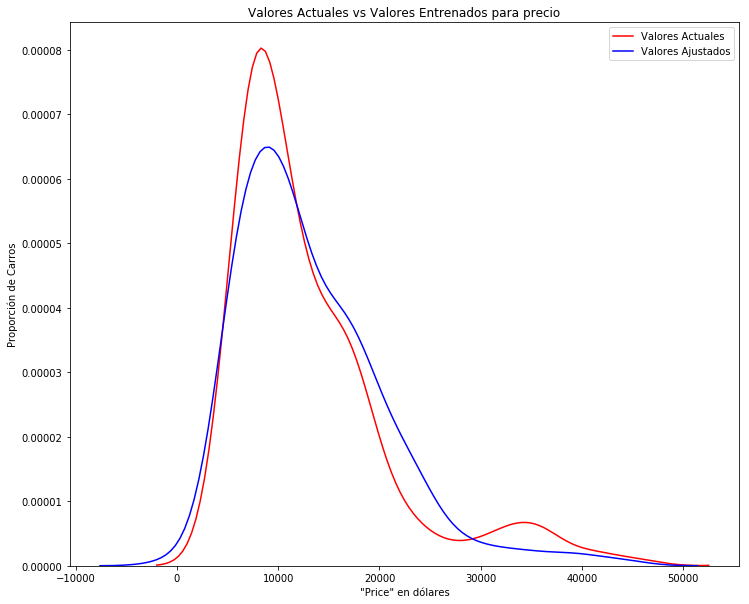

In [65]:
# Gráfica de distribución
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Valores Actuales")
sns.distplot(Resultado2, hist=False, color="b", label="Valores Ajustados" , ax=ax1)


plt.title('Valores Actuales vs Valores Entrenados para precio')
plt.xlabel('"Price" en dólares')
plt.ylabel('Proporción de Carros')

plt.show()
plt.close()

    * Este modelo se ajusta bien a los datos, aunque podría ser mejor.

* Medidas de error

In [66]:
# R cuadrado
print('El R-Cuadrado es: ', lm2.score(z, y))
print('Aproximadamente el 81,18% de las variaciones en "price" son explicadas por las variaciones en las múltiples variables')
# Error cuadrático medio
mse2 = mean_squared_error(df['price'], Resultado2)
print('El error cuadrático medio de "price" y la predicción es: ', mse2)

El R-Cuadrado es:  0.811854499813515
Aproximadamente el 81,18% de las variaciones en "price" son explicadas por las variaciones en las múltiples variables
El error cuadrático medio de "price" y la predicción es:  11823374.644007174


### <font color='#357EC7'>Modelo 3: Polinómico "Price" - "highway-mpg"</font>

Basado en las características descritas en la variable "highway-mpg" anteriormente, se utiliza el gráfico residual para proponer un modelo polinómico basado en estas características. 

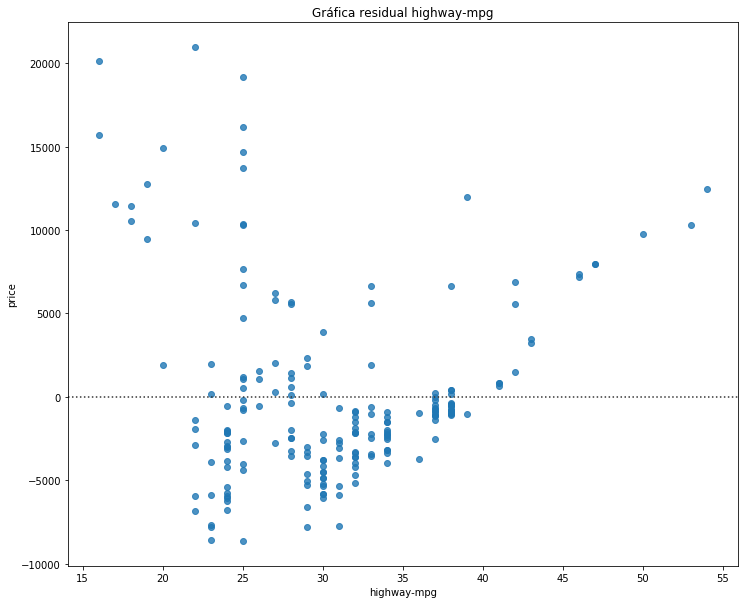

In [67]:
# Gráfica Residual
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.title('Gráfica residual highway-mpg')
plt.show()

Estos datos parecen no seguir una distribución aleatórea, lo que sugiere que un modelo polinómico podría ajustarse de mejor manera.

In [68]:
# Función para graficar regresión polinómica

def PlotPolly(modelo, variable_indepndinte, variable_dependiente, Nombre):
    x_new = np.linspace(15, 55, 100)
    y_new = modelo(x_new)

    plt.plot(variable_indepndinte, variable_dependiente, '.', x_new, y_new, '-')
    plt.title('Entrenamiento modelo polinómico con Matplotlib para "Price" ~ "highway-mpg"')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Nombre)
    plt.ylabel('"Price"')

    plt.show()
    plt.close()

In [69]:
# Definición en la variable del modelo
x3 = df['highway-mpg']
y3 = df['price']
# Polinomio de grado 3
f = np.polyfit(x3, y3, 3)
p = np.poly1d(f)
print('La ecuación del modelo es la siguiente:\n \n', p)

La ecuación del modelo es la siguiente:
 
         3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


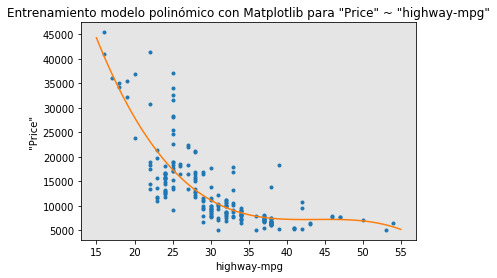

In [70]:
# Gráfica de la función
PlotPolly(p, x3, y3, 'highway-mpg')

Se ajusta de mejor manera a los datos este modelo polinómico.

* Medidas de error

In [71]:
# R cuadrado
r_squared = r2_score(y, p(x3))
print('El R-Cuadrado es: ', r_squared)
print('Aproximadamente el 67,42% de las variaciones en "price" son explicadas por las variaciones en "highway-mpg" ')
# Error cuadrático medio
mse3 = mean_squared_error(df['price'], p(x3))
print('El error cuadrático medio de "price" y la predicción es: ', mse3)

El R-Cuadrado es:  0.674194666390652
Aproximadamente el 67,42% de las variaciones en "price" son explicadas por las variaciones en "highway-mpg" 
El error cuadrático medio de "price" y la predicción es:  20474146.426361218


### <font color='#357EC7'>Modelo 4: Polinómio de múltiples variables</font>

In [72]:
# Creación del objeto polinómico
pr = PolynomialFeatures(degree=2)
# Entrenamiento del modelo
Z_pr = pr.fit_transform(z)
# Se verifican la cantidad de variables del nuevo modelo
print(Z_pr.shape, ', ahora se generaron 15 variables.')

(201, 15) , ahora se generaron 15 variables.


In [73]:
# Creación parámetros del modelo
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# 
pipe = Pipeline(Input)
# Entrenamiento
pipe.fit(z,y)
# Predicción
ypipe = pipe.predict(z)
ypipe[0:4]

array([12396.25072589, 12396.25072589, 18427.88376418,  9983.16028344])

In [74]:
# Esta parte queda pendiente porque debo confirmar si aplican los mismos errores y si tiene que veer algo el parámetro alfa.
# R cuadrado
print('El R-Cuadrado es: ', pipe.score(z,y) )
print('Aproximadamente el 85,31% de las variaciones en "price" son explicadas por las variaciones en las múltiples variables ')
# Error cuadrático medio
mse4 = mean_squared_error(df['price'], ypipe)
print('El error cuadrático medio de "price" y la predicción es: ', mse4)

El R-Cuadrado es:  0.8531604507831239
Aproximadamente el 85,31% de las variaciones en "price" son explicadas por las variaciones en las múltiples variables 
El error cuadrático medio de "price" y la predicción es:  9227640.316815654


#### <font color='#357EC7'>Evaluando los modelos </font>

A continuación se realizará la evaluación de los resultados obtenidos.

<!-- Tabla Entendiendo el dataset-->
<table>
  <colgroup span="4" class="columns"></colgroup>
  <tr>
    <th>Modelo</th>
    <th>R-Cuadrado</th>
    <th>MSE</th>
  </tr>
  <tr>
    <td>1</td>
    <td>0.641</td>
    <td>22510543.7</td>
  </tr>
  <tr>
    <td>2</td>
    <td>0.811</td>
    <td>11823374.6</td>
  </tr>
  <tr>
    <td>3</td>
    <td>0.674</td>
    <td>20474146.4</td>
  </tr>
  <tr>
    <td>4</td>
    <td>0.8514</td>
    <td>9227640.3</td>
  </tr>
</table>

* El modelo 4 presenta mejores valores, por los mejores resultados.

## <font color='#357EC7'>PARTE 4: Refinamiento y ajuste del modelo </font>

Antes de iniciar, se definen algunas funciones auxiliares para graficar

In [75]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('"Price"')
    plt.ylabel('Proporción de carros')

    plt.show()
    plt.close()

In [76]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

* 1. Cómo parte importante de las pruebas del modelo, se definen las partes de los datos de 'Training' y 'Test'

In [77]:
# Se definen las variables x (predictoras), y (objetivo)
y_data = df['price']
x_data = df.drop('price',axis=1)
# Se distribuyen los datos de 'training' y 'test'
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("Número de muestras de 'test' :", x_test.shape[0])
print("Número de muestras de 'training':",x_train.shape[0])

Número de muestras de 'test' : 21
Número de muestras de 'training': 180


* 2. Se entrena el modelo con los datos de 'test' y 'training' y se obtienen sus respectivos valores de error

In [78]:
# Datos de entrenamiento
pipe_train = Pipeline(Input)
pipe_train.fit(x_train[["horsepower","curb-weight","engine-size","highway-L/100km"]],y_train)
print("R-Cuadrado del modelo con datos 'train'",pipe_train.score(x_train[["horsepower","curb-weight","engine-size","highway-L/100km"]],y_train))
# Datos de prueba
pipe_test = Pipeline(Input)
pipe_test.fit(x_test[["horsepower","curb-weight","engine-size","highway-L/100km"]],y_test)
print("R-Cuadrado del modelo con datos 'test'",pipe_test.score(x_test[["horsepower","curb-weight","engine-size","highway-L/100km"]],y_test))

R-Cuadrado del modelo con datos 'train' 0.856999600210886
R-Cuadrado del modelo con datos 'test' 0.9702397328146871


    * Gráfica datos "train"

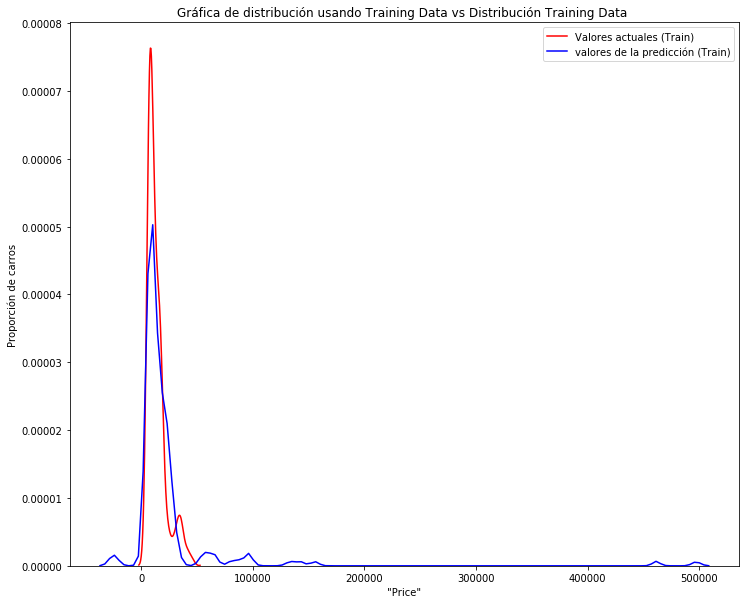

In [79]:
# Gráfica
Title = 'Gráfica de distribución usando Training Data vs Distribución Training Data '
DistributionPlot(y_train, pipe_train.predict(x_train[["horsepower","curb-weight","engine-size","highway-L/100km"]]), "Valores actuales (Train)", "valores de la predicción (Train)", Title)

    * Gráfica de datos "test"

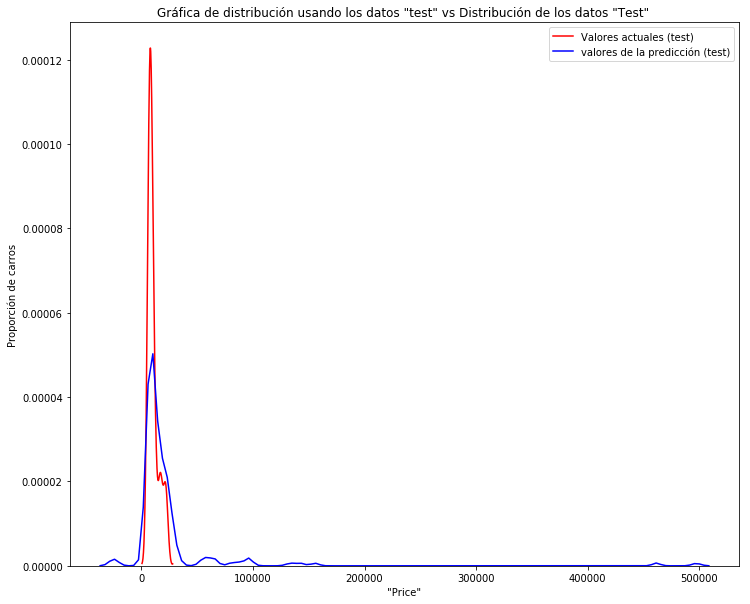

In [80]:
# Gráfica
Title = 'Gráfica de distribución usando los datos "test" vs Distribución de los datos "Test" '
DistributionPlot(y_test, pipe_test.predict(x_train[["horsepower","curb-weight","engine-size","highway-L/100km"]]), "Valores actuales (test)", "valores de la predicción (test)", Title)

    * Los datos muestran el comportamiento esperado

* Es necesario aplicar una metodología de validación cruzada para evitar caer en sesgos. 

In [81]:
# Valor R cuadrado de la validación cruzada
R_cruzada = cross_val_score(pipe, x_data[["horsepower","curb-weight","engine-size","highway-L/100km"]], y_data, cv=4)
print('Los puntajes R cuadrado de la validación crizada fueron: ', R_cruzada)
print("La media de los cortes es", R_cruzada.mean(), "y la desviación estándar es " , R_cruzada.std())

Los puntajes R cuadrado de la validación crizada fueron:  [0.74384471 0.72033682 0.24642399 0.52379221]
La media de los cortes es 0.5585994331433193 y la desviación estándar es  0.19946167629729933


In [82]:
# Prueba del modelo con validación cruzada
Resultado4 = cross_val_predict(pipe,x_data[["horsepower","curb-weight","engine-size","highway-L/100km"]], y_data,cv=4)
Resultado4[0:5]

array([10730.32200949, 10730.32200949, 17185.4959545 ,  9449.88509805,
       14154.38748449])

* Se aplica una prueba de Ridge para disminuir la varianza y ajustar el modelo. 

In [83]:
# Prueba Ridge

RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train[["horsepower","curb-weight","engine-size","highway-L/100km"]], y_train)
Resultado4_R = RigeModel.predict(x_train[["horsepower","curb-weight","engine-size","highway-L/100km"]])
print('Predicciones:',Resultado4_R[0:4],RigeModel.score(x_train[["horsepower","curb-weight","engine-size","highway-L/100km"]], y_train))
print('Grupo de prueba :', y_test[0:4].values)

Predicciones: [ 7624.62508317 28449.20677899 14839.84799939  3856.29236639] 0.8169039845716464
Grupo de prueba : [ 9549.  6229. 10245.  7295.]


In [84]:
# Prueba del Ridge Model
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train[["horsepower","curb-weight","engine-size","highway-L/100km"]], y_train)
    Rsqu_train.append(RigeModel.score(x_train[["horsepower","curb-weight","engine-size","highway-L/100km"]], y_train))
    Rsqu_test.append(RigeModel.score(x_test[["horsepower","curb-weight","engine-size","highway-L/100km"]], y_test))

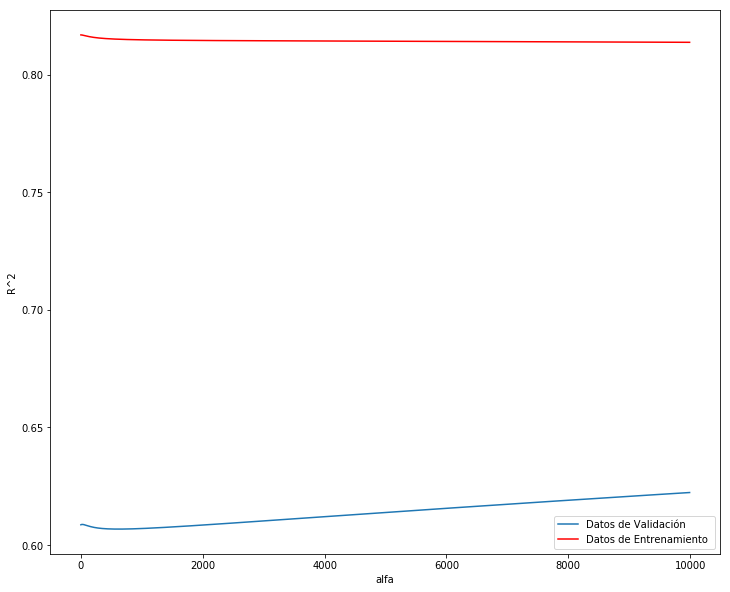

In [85]:
# Visualización del R cuadrado para diferentes valores de alfa en los datos de validación y entrenamiento
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='Datos de Validación  ')
plt.plot(Alpha,Rsqu_train, 'r', label='Datos de Entrenamiento ')
plt.xlabel('alfa')
plt.ylabel('R^2')
plt.legend()

    * Se procede a buscar los valores óptimos del hiperparámetro alfa mediante "Grid Search"

* Grid Search

In [86]:
# Se crea un vector con los posibles valores de alfa
parameters1= [{'alpha': [0, 0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000], 'normalize':[True,False]} ]
# Se crea un objeto Ridge
RR = Ridge()
# Se crea el objeto Grid
Grid1 = GridSearchCV(RR, parameters1,cv=4)
# Se entrena el modelo
Grid1.fit(x_data[["horsepower","curb-weight","engine-size","highway-L/100km"]], y_data)
# Se encuentran los mejores parámetros
BestRR = Grid1.best_estimator_
print("Mejores parámetros para este modelo Rigde: \n",BestRR)
# Se visualiza el puntaje de R cuadrado obtenido
print("R cuadrado modelo Ridge optimizado con Grid Search: ",BestRR.score(x_test[["horsepower","curb-weight","engine-size","highway-L/100km"]], y_test))

Mejores parámetros para este modelo Rigde: 
 Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)
R cuadrado modelo Ridge optimizado con Grid Search:  0.6210401843913356


Con esto quedan 2 modelos para realizar las predicciones: 
* El modelo polinómico de múltiples variables sin modificar el hiperparámetro alfa.
* El modelo Ridge, con la optimización del hiperparámetro alfa.

Hasta acá la implementación y funcionamiento del proyecto. 

Versión 1.0. - Sujeta a ajustes posteriores.



Gracias por la atención !!!

<a href="https://www.linkedin.com/in/brayan-steven-alfonso-garc%C3%ADa-524446122/">Brayan Alfonso, Científico de datos Jr.</a>.

Fuente:

[1]. Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

[2]. Cognitive Class. 